In [274]:
#%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [664]:
import sys

sys.version

'3.8.5 (default, Sep  4 2020, 02:22:02) \n[Clang 10.0.0 ]'

In [275]:
from qutip import *
import cmath
import math

In [681]:
#Parameters foR hamiltonian
V=1.0
hx=1.0
hz=0.0

#dissipation
gamma=1.0

gamma0=0.0

In [682]:
T=10

stepp=0.01
Stepnumber=int(T/stepp)



tlist = np.linspace(0,T,Stepnumber)

#Number of qubits
Num=3

In [683]:
init=[]

for n in range(Num):
    init.append(basis(2,0))
    
init=tensor(init)

In [684]:
Qeye=[]

for n in range(Num):
    Qeye.append(qeye(2))
    
Qeye=tensor(Qeye)

In [685]:
def Xop(m): 
    
    X=[]
    for n in range(Num):
        
        if n==m:
            X.append(sigmax())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

In [686]:
def Yop(m): 
    
    X=[]
    for n in range(Num):
        
        if n==m:
            X.append(sigmay())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

In [687]:
def Zop(m): 
    
    X=[]
    for n in range(Num):
        
        if n==m:
            X.append(sigmaz())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

In [688]:
def Xop2(m): 
    
    X=[]
    for n in range(Num+1):
        
        if n==m:
            X.append(sigmax())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

In [689]:
def Yop2(m): 
    
    X=[]
    for n in range(Num+1):
        
        if n==m:
            X.append(sigmay())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

In [690]:
def Zop2(m): 
    
    X=[]
    for n in range(Num+1):
        
        if n==m:
            X.append(sigmaz())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

In [691]:
Hamset=[]

V=1.0 

hx=1.0 

hz=0

for n in range(Num-1):
    
    Hamset.append( V/4* Zop(n)*Zop(n+1) )
    
for n in range(Num):
    
    Hamset.append(hx*Xop(n))
    
    Hamset.append(hz*Zop(n))
    


In [692]:
Hamil= 0* Zop(0)

for n in range(len(Hamset)):
    Hamil=Hamil+Hamset[n]

In [693]:
Hamil=Hamil

In [694]:
eigvals, eigvecs= Hamil.eigenstates()

In [695]:
eigvals

array([-3.03124812, -1.36815091, -1.        , -0.66309722,  0.66309722,
        1.        ,  1.36815091,  3.03124812])

In [696]:
def fil(a,x):
    return sqrt(a/pi)*exp(-a*x**2)

In [697]:
anc=(basis(2,0)+basis(2,1))/sqrt(2)

In [698]:
plus=(basis(2,0)+basis(2,1))/sqrt(2)

In [699]:
def Depolarise(rho,n,p):
    
    rho=(1.0-p)*rho+(p/3.0)*(Xop(n)*rho*Xop(n)+Yop(n)*rho*Yop(n)+Zop(n)*rho*Zop(n))
    
    return rho

In [700]:
def Depolarise2(rho,n,p):
    
    rho=(1.0-p)*rho+(p/3.0)*(Xop2(n)*rho*Xop2(n)+Yop2(n)*rho*Yop2(n)+Zop2(n)*rho*Zop2(n))
    
    return rho

In [701]:
def Trotter(Ha,tt, N):
    Tro= Qeye 
    
    for n in range(len(Ha)):
        
        Tro= Tro*(-1j*Ha[n]*tt/N).expm()
        
    
    Res= Tro**N
    
    return Res
    

In [702]:
def controlH(Ham,tt): 
    contev=tensor(basis(2,0)*basis(2,0).dag(), Qeye)+tensor(basis(2,1)*basis(2,1).dag(), (-1j*Ham*tt).expm())
    
    return contev

In [703]:
def controlHTro(Ha,tt, N): 
    
    Trop= Trotter(Ha, tt, N)
    
    contev=tensor(basis(2,0)*basis(2,0).dag(), Qeye)+tensor(basis(2,1)*basis(2,1).dag(), Trop)
    
    return contev



In [704]:
def noisyTrotone(tt, NN, rho, pp):
    
    sta=rho
    
    for n in range(Num-1):
        
        contev=tensor(basis(2,0)*basis(2,0).dag(), Qeye)+tensor(basis(2,1)*basis(2,1).dag(), (-1j*V/4* Zop(n)*Zop(n+1)*tt/NN).expm())
    
        
        sta=contev* sta* contev.dag()
        
        sta= Depolarise2(sta,0,pp) 
        
        sta= Depolarise2(sta,n,pp) 
        
        sta= Depolarise2(sta,n+1,pp) 
        
    for n in range(Num):
        
        contev=tensor(basis(2,0)*basis(2,0).dag(), Qeye)+tensor(basis(2,1)*basis(2,1).dag(), (-1j*hx* Xop(n)*tt/NN).expm())
        
        sta=contev*sta* contev.dag()
        
    
    return sta
        
    

            
        
        

In [705]:
# main code 

delt = 0.5

Nran=20

noisepro=0

Ntro=20




In [706]:
#init=[]

#for n in range(Num):
    #init.append(plus)
    
#init=tensor(init)

In [707]:
quint=init

quint=quint/norm(quint)

In [708]:
quint2=tensor(ket2dm(anc), ket2dm(quint))

In [709]:
import random

In [710]:
#  Add shot noise, no physical noise


EX=[]

EY=[]


Nshots=1000


for n1 in range(-Nran, Nran+1):

    t1=delt*n1

    state= controlHTro(Hamset,t1, Ntro)*quint2*controlHTro(Hamset, t1, Ntro).dag()

    expecx= (tensor(sigmax(), Qeye)* state).tr()

    expecy= (tensor(sigmay(), Qeye)* state).tr()
    
    varx= 1- expecx**2 
    
    vary=1- expecy**2 
    
    randx =  random.gauss(mu=expecx, sigma=sqrt(varx/Nshots))
    
    randy =  random.gauss(mu=expecy, sigma=sqrt(vary/Nshots))
    
    EX.append(randx)
    
    EY.append(randy)

In [711]:
#  Add shot noise, with physical noise


EX=[]

EY=[]

perr=0.000

Time=[]


Nshots=10**15


for n1 in range(-Nran, Nran+1):
    
    
   
    
    

    t1=delt*n1
    
    Time.append(t1)
        
    
    # noisyTrotone(tt, NN, rho, pp)
    
    state=quint2
    
    for kk in range(Ntro):
        state= noisyTrotone(t1, Ntro, state, perr)
    
    
    
    expecx= (tensor(sigmax(), Qeye)* state).tr()

    expecy= (tensor(sigmay(), Qeye)* state).tr()
    
    varx= 1- expecx**2 
    
    vary=1- expecy**2 
    
    randx =  random.gauss(mu=expecx, sigma=sqrt(varx/Nshots))
    
    randy =  random.gauss(mu=expecy, sigma=sqrt(vary/Nshots))
    
    EX.append(randx)
    
    EY.append(randy)



In [712]:
EX

[0.6194363665362121,
 0.48519497274901346,
 0.5851493431592544,
 0.7108635299259599,
 0.30784331799956377,
 -0.3839233555517915,
 -0.5992319752047025,
 -0.30676921276269886,
 -0.17235072914009733,
 -0.3232747778085129,
 -0.21908139373511862,
 0.17653605313312076,
 0.19897700949466482,
 -0.302901485680933,
 -0.6097441041214713,
 -0.34355789381844226,
 -0.03389329699562789,
 -0.0393537852286008,
 0.09780545260317311,
 0.64963091186854,
 1.0,
 0.6496308787959035,
 0.09780548678607531,
 -0.03935382098275466,
 -0.0338933543966505,
 -0.3435578259595464,
 -0.6097440857426427,
 -0.30290151429179,
 0.198976983269119,
 0.17653600233298533,
 -0.21908140550745817,
 -0.32327472272529834,
 -0.17235076972955996,
 -0.30676922079226066,
 -0.5992319649411021,
 -0.3839233846623192,
 0.30784328543369643,
 0.7108634749190385,
 0.5851493075406365,
 0.48519495944812213,
 0.6194363697098609]

In [713]:
#  Sweep energy 


gamm=0.001

delE=0.1

Range=100

Val=[]






    
Energy=[]

for k in range(-Range, Range+1):

    Ee=delE*k

    Energy.append(Ee)





    #noisepro=0.1

    val=0
    
    for n in range(0, 2*Nran+1):
        
        t1=delt*(n-Nran)



        
        val=val+fil(gamm, t1)*exp(1j*Ee*t1)* (EX[n]+1j*EY[n]) *delt

            #val2=val2+fil(gamm, t1)*fil(gamm, t2)*exp(1j*Ee*(t1-t2))*Res5[ll][integer]*delt**2

            #val3=val3+fil(gamm, t1)*fil(gamm, t2)*delt**2




    Val.append(abs(val))

Text(0, 0.5, 'Population')

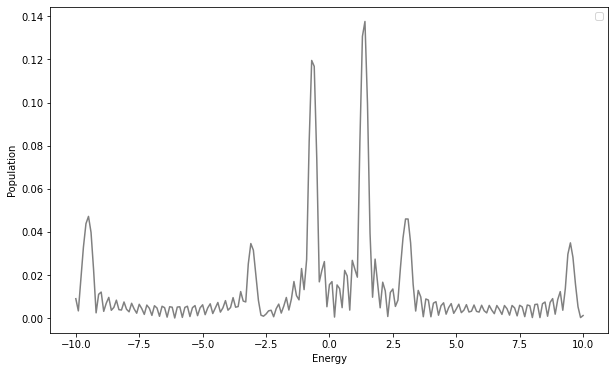

In [714]:
#tlist = np.linspace(0,error,stepnum)



fig, axes = plt.subplots(1, 1, figsize=(10,6))

# Reference point coordinates
ref_energy = eigvals[0]  # Example x-coordinate for the reference point
ref_val = np.sin(ref_energy)  # Example y-coordinate for the reference point

axes.plot(Energy, Val, "-",color="Gray")





axes.legend(loc=0)
axes.set_xlabel('Energy')
axes.set_ylabel('Population')

Text(0, 0.5, 'Population')

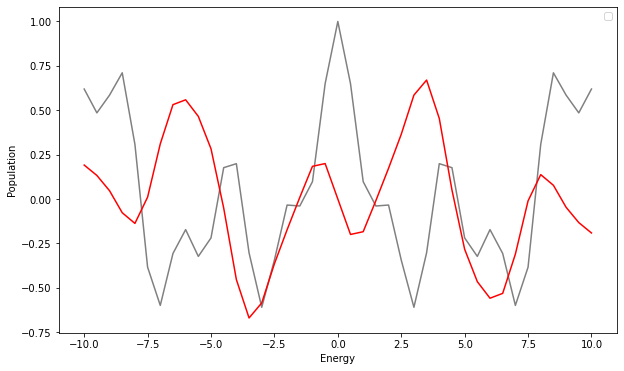

In [715]:
#tlist = np.linspace(0,error,stepnum)



fig, axes = plt.subplots(1, 1, figsize=(10,6))

# Reference point coordinates
ref_energy = eigvals[0]  # Example x-coordinate for the reference point
ref_val = np.sin(ref_energy)  # Example y-coordinate for the reference point

axes.plot(Time, EX, "-",color="Gray")

axes.plot(Time, EY, "-",color="Red")





axes.legend(loc=0)
axes.set_xlabel('Energy')
axes.set_ylabel('Population')

In [716]:
len(EY)

41

In [717]:
Val

[0.008998715209427268,
 0.0033455210859653544,
 0.018419346448458215,
 0.032919126841213814,
 0.04381454988606704,
 0.047185856850154015,
 0.03977587463431621,
 0.022565126535872494,
 0.0024347112096932775,
 0.01104221137120117,
 0.012078107555671085,
 0.0031273317889701177,
 0.006895074359780558,
 0.009606234785445217,
 0.0036262442378296486,
 0.004942632598307327,
 0.008315926492305281,
 0.003906375860726143,
 0.0037477575318589198,
 0.007476923844076673,
 0.004096306857118822,
 0.0029042059411459814,
 0.006871166558854311,
 0.004249807665602292,
 0.0022517915580869217,
 0.006406838333055102,
 0.004391386914837077,
 0.001713521818789097,
 0.006037263362953268,
 0.004533851518296399,
 0.001246887767889069,
 0.005735772051261523,
 0.004685128294494633,
 0.0008256546763833865,
 0.005485972578259365,
 0.004851283332931994,
 0.00043185015401024933,
 0.0052773860301118325,
 0.0050381138079417485,
 5.1704576717176536e-05,
 0.005103301576216479,
 0.0052522550098662414,
 0.0003267694048008001

Text(0, 0.5, 'Population')

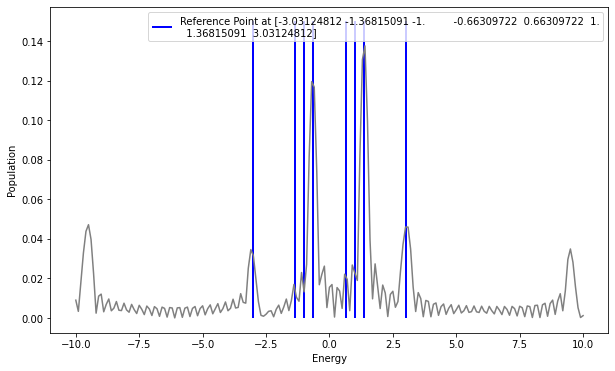

In [718]:
#tlist = np.linspace(0,error,stepnum)



fig, axes = plt.subplots(1, 1, figsize=(10,6))



axes.plot(Energy, Val, "-",color="Gray")

ref_energy= eigvals

axes.vlines(x=ref_energy, ymin=0, ymax=0.15, color='blue', linewidth=2, label=f'Reference Point at {ref_energy}')

axes.legend(loc=0)



axes.legend(loc=0)
axes.set_xlabel('Energy')
axes.set_ylabel('Population')

In [655]:
eigvals

array([-3.03124812, -1.36815091, -1.        , -0.66309722,  0.66309722,
        1.        ,  1.36815091,  3.03124812])

In [656]:
init

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [657]:
(ket2dm(eigvecs[3])*ket2dm(init)).tr()

0.33185119824472414

In [658]:
Num

3

In [659]:
Qeye

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]

In [660]:
eigvals

array([-3.03124812, -1.36815091, -1.        , -0.66309722,  0.66309722,
        1.        ,  1.36815091,  3.03124812])

In [661]:
def procool(Ham, E0, aa):
    
    return (-aa*(Ham-E0*Qeye)**2).expm()

In [662]:
 tracedist(procool(Hamil, eigvals[7], 20), ket2dm(eigvecs[7]))

0.0

In [663]:
fidelity(procool(Hamil, eigvals[0], 20), ket2dm(eigvecs[0]))

1.0000000072033828

In [680]:
Hamil

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.5  1.   1.   0.   1.   0.   0.   0. ]
 [ 1.   0.   0.   1.   0.   1.   0.   0. ]
 [ 1.   0.  -0.5  1.   0.   0.   1.   0. ]
 [ 0.   1.   1.   0.   0.   0.   0.   1. ]
 [ 1.   0.   0.   0.   0.   1.   1.   0. ]
 [ 0.   1.   0.   0.   1.  -0.5  0.   1. ]
 [ 0.   0.   1.   0.   1.   0.   0.   1. ]
 [ 0.   0.   0.   1.   0.   1.   1.   0.5]]